# Sentiment Analysis of Health Tweets -- Exploratory Data Analysis

## Introduction

After the data cleaning step, the next step is to explore the data before doing any deep leaning. Here I will check **Most Common Words** to see which health keywords people are talking most at this moment.


## Loading the data


In [1]:
#load python packages
import os
import pandas as pd
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from datetime import datetime
from nltk.corpus import stopwords
import nltk
from collections import Counter
from wordcloud import WordCloud
%matplotlib inline

In [4]:
df = pd.read_csv('data/clean_data.csv',index_col=0)
df.head()

,user_name,date,text
0,15317,2020-11-03,anxiety x games mode
1,3333,2020-11-03,officialmonstax oh im sorry make anxious
2,18410,2020-11-03,way dey see body app top deɛ asɛ mo nta mpo kai
3,8294,2020-11-03,ewjulii count ways funtime freddy whip nae nae...
4,3949,2020-11-03,mx7mention officialmonstax officialwonho love ...


### Create a big list of words out of all the tweets

Let's put all words in all tweets together to check the most commom words.

In [5]:
words_list = [word for line in df.text for word in line.split()]
words_list[:5]

['anxiety', 'x', 'games', 'mode', 'officialmonstax']

### Create the WordCloud

(-0.5, 799.5, 499.5, -0.5)

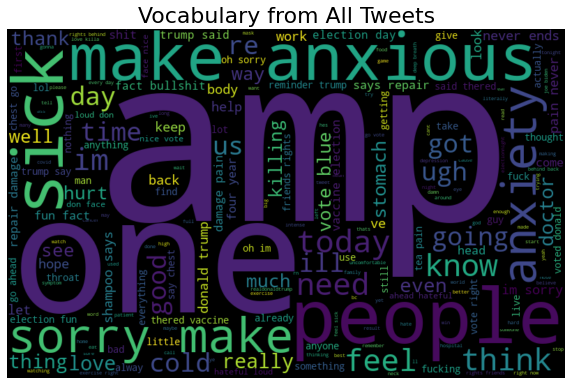

In [6]:
wc = WordCloud(width=800, height=500, random_state=42)
plt.figure(figsize=(10, 7))
wc.generate(' '.join(words_list))
plt.imshow(wc, interpolation="bilinear")
plt.title("Vocabulary from All Tweets", fontsize = 22)
plt.axis("off")

From the WordCloud figher above we can see that people talked about 'anxious', 'sick', 'anxiety', 'cold' a lot. But there're some frequent words have very little meaning and could be added to a stop words list.

**First, let's check the frequecy of each word.**

In [7]:
word_counts = Counter(words_list).most_common()
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'frq']
words_df = words_df.sort_values('frq', ascending=False)
words_df.head(50)

,word,frq
0,like,1761
1,i’m,1728
2,people,1508
3,sick,1382
4,amp,1375
5,vote,1375
6,trump,1361
7,im,1353
8,get,1284
9,make,1194


In [8]:
df_trump = df[df.text.str.contains('trump')]
df_trump

,user_name,date,text
35,552,2020-11-03,fxrran21 bismillahfc cfcant fabrizioromano bre...
49,12370,2020-11-03,watching philrosenthal drinking beer fend elec...
151,8102,2020-11-03,rexchapman thats one extra nervous trumpy vote...
155,13093,2020-11-03,thing that’s giving anxiety rn people going ge...
161,18602,2020-11-03,psa nonamericans right difficult time us pleas...
...,...,...,...
20722,2171,2020-11-03,video amish horse buggy trump train goes viral...
20726,7027,2020-11-03,where’s vaccine promised would election day tr...
20751,6798,2020-11-03,viral blog post falsely claims “antifa flyer” ...
20758,15443,2020-11-03,didn’t trump say would vaccine electionday e...


In [9]:
df_trump_keyword = df_trump[df_trump.text.str.contains('vaccine|covid|virus')]
df_trump_keyword

,user_name,date,text
1021,5534,2020-11-03,i’m getting anxiety got uk elections would def...
1035,18093,2020-11-03,one stressed out anxiety ridden one us hannahb...
2551,16054,2020-11-03,hahaha soooo true also deadly virus survival r...
2552,2954,2020-11-03,texas pls keep pushing bidenharris going let t...
2569,973,2020-11-03,palesa99570181 amadasungamstry justinenemerem ...
...,...,...,...
20655,4535,2020-11-03,realdonaldtrump donald trump vaccine cavid 19 ...
20678,8101,2020-11-03,dear realdonaldtrump vaccine
20726,7027,2020-11-03,where’s vaccine promised would election day tr...
20758,15443,2020-11-03,didn’t trump say would vaccine electionday e...


We can see that most people was talking about Covid-19 if the tweet is related with Trump. So let's keep the tweets and add those unmeaning words to the stopwords. 

In [10]:
# read the keywords from txt to a list
txt_list = []

with open('keywords.txt', "r") as f:
    txt_list = f.read().split()

keywords = [word.strip(',') for word in txt_list]
keywords

['ache',
 'aches',
 'achey',
 'aching',
 'achy',
 'acl',
 'acne',
 'acupuncture',
 'advil',
 'aleve',
 'allergic',
 'allergies',
 'allergy',
 'ankle',
 'antibiotics',
 'anxiety',
 'anxious',
 'appetite',
 'appointment',
 'appt',
 'arthritis',
 'aspirin',
 'asthma',
 'backache',
 'battling',
 'bedtime',
 'benadryl',
 'bladder',
 'blisters',
 'body',
 'breathing',
 'bronchitis',
 'bruised',
 'burning',
 'bypass',
 'caffeine',
 'cancer',
 'chemo',
 'chest',
 'chronic',
 'clinic',
 'clogged',
 'codeine',
 'cold',
 'colds',
 'coma',
 'congested',
 'congestion',
 'contagious',
 'cough',
 'coughed',
 'coughing',
 'coughs',
 'cramps',
 'cravings',
 'crutches',
 'cure',
 'cured',
 'dealing',
 'dehydrated',
 'dehydration',
 'dental',
 'dentist',
 'depression',
 'diabetes',
 'diagnosed',
 'diarrhea',
 'dieting',
 'dizziness',
 'dizzy',
 'doctor',
 'doctors',
 'dose',
 'drained',
 'drowsy',
 'drugged',
 'ear',
 'earache',
 'eaten',
 'elbow',
 'emergency',
 'excedrin',
 'excruciating',
 'exercise',

In [11]:
# get top 20 most common words not including sick
add_stopwords = [word for word, count in word_counts if count > 500 if word not in keywords]
add_stopwords

['like',
 'i’m',
 'people',
 'amp',
 'vote',
 'trump',
 'im',
 'get',
 'make',
 'election',
 'go',
 'day',
 'today',
 'one',
 'want',
 'us',
 'know',
 'it’s',
 'time',
 'need',
 'back',
 'please',
 'never',
 'don’t',
 'right',
 'feel',
 'take',
 'going',
 'still',
 'much',
 'new',
 'really',
 'even',
 'think',
 'it',
 'love',
 'say',
 'sorry',
 'good',
 'would',
 'said',
 'see',
 'got',
 'way',
 'years',
 'rights',
 'oh']

(-0.5, 799.5, 499.5, -0.5)

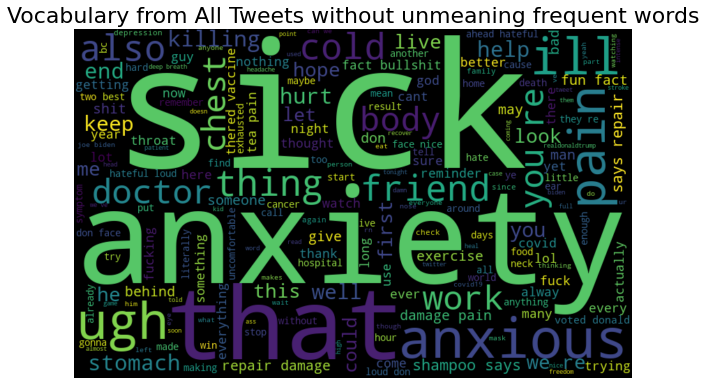

In [12]:
wc = WordCloud(stopwords=add_stopwords,width=800, height=500, random_state=42,max_font_size=250)
plt.figure(figsize=(10, 7))
wc.generate(' '.join(words_list))
plt.imshow(wc, interpolation="bilinear")
plt.title("Vocabulary from All Tweets without unmeaning frequent words", fontsize = 22)
plt.axis("off")

After removing unmeaning words, we can see that our data looks more sence. And we can see that people is talking about 'anxiety', 'sick', 'ill', 'pain' more ofen.

### Let's check how often people talk about for each word

(-0.5, 799.5, 499.5, -0.5)

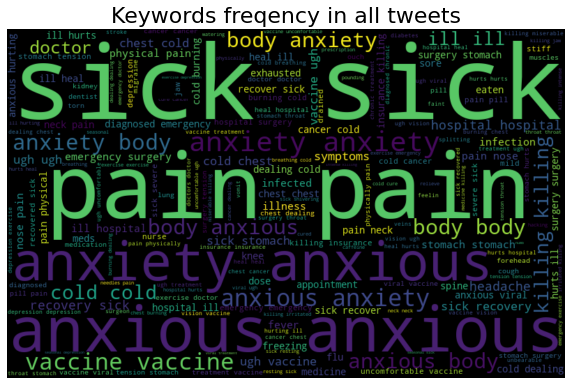

In [13]:
words_list_keywords = [word for word in words_list if word in keywords]
wc = WordCloud(width=800, height=500, random_state=42,max_font_size=250)
plt.figure(figsize=(10, 7))
wc.generate(' '.join(words_list_keywords))
plt.imshow(wc, interpolation="bilinear")
plt.title("Keywords freqency in all tweets", fontsize = 22)
plt.axis("off")

## Conclusion
From WordCloud figures above we can see that people talk about 'sick', 'pain', 'anxiety', 'anxious','cold' and 'vaccine' a lot.